In [ ]:
! pip install numpy 
! pip install pandas
! pip install statsmodels

In [10]:

%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [ ]:
df=pd.read_csv(r"F:\computational statistic\computational-statistic-for-sem3\dataset\train.csv")

numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

                                                     1)  One-Sample T-Test 

In [54]:
sample = df['SalePrice']
hypothesized_mean = 200000  # Replace with your desired hypothesized mean


In [55]:
# Perform the one-sample t-test
t_stat, p_value = stats.ttest_1samp(sample, hypothesized_mean)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -9.176449066651342
p-value: 1.476445532734265e-19


In [56]:

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis.The sample mean is significantly different from the  hypothesized mean.")
 
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the sample mean and the hypothesized  mean.")



Reject the null hypothesis.The sample mean is significantly different from the  hypothesized mean.


                                                   2) Two-Sample T-Test

In [53]:
group1 = df[df['PoolArea'] > 0]['SalePrice']
group2 = df[df['PoolArea'] == 0]['SalePrice']

In [ ]:

t_stat, p_value = stats.ttest_ind(group1, group2)
# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 3.593943524548988
p-value: 0.000336552381430235


In [ ]:
alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean house prices between the two groups.")
 
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean house prices between the two groups.")

Reject the null hypothesis. There is a significant difference in mean house prices between the two groups.


                                                   3) Paired T-Test

In [57]:
nitro1 = df['1stFlrSF']
nitro2 = df['TotalBsmtSF']

print("Mean of NC1.0:", nitro1.mean())
print("Mean of NC2.5:", nitro2.mean())

Mean of NC1.0: 1162.626712328767
Mean of NC2.5: 1057.4294520547944


In [58]:
t_statistic, p_value1 = stats.ttest_rel(a=nitro1, b=nitro2)
print("Paired T-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value1)

Paired T-test results:
T-statistic: 15.897364983327213
P-value: 1.3229487040227171e-52


In [60]:
from scipy import stats


n = len(nitro1)


mean_diff = (nitro1 - nitro2).mean()
std_diff = (nitro1 - nitro2).std(ddof=1)  


confidence_interval = stats.t.interval(
    0.95,  
    df=n - 1,  
    loc=mean_diff,  
    scale=std_diff / np.sqrt(n)  
)

print("95% confidence interval for the mean difference:", confidence_interval)



95% confidence interval for the mean difference: (np.float64(92.21686840294933), np.float64(118.17765214499588))


In [61]:
confidence_interval_99 = stats.t.interval(
0.99, 
df=n - 1, 
loc=mean_diff,
scale=std_diff / np.sqrt(n) 

)

print("99% confidence interval for the mean difference:", confidence_interval)


99% confidence interval for the mean difference: (np.float64(92.21686840294933), np.float64(118.17765214499588))


                                               4) Type I and Type II Error

In [62]:
nitro1 = df['1stFlrSF']
nitro2 = df['TotalBsmtSF']

t_statistic, p_value1 = stats.ttest_rel(a=nitro1, b=nitro2)
print("Paired T-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value1)

Paired T-test results:
T-statistic: 15.897364983327213
P-value: 1.3229487040227171e-52


In [ ]:
#type 1 error

alpha = 0.05  # Significance level
true_mean_price = df['SalePrice'].mean()  #try 'LotFrontage'

# Simulate a null hypothesis that the mean price is lower
hypothesized_mean_price = true_mean_price - 10000

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(df['SalePrice'], hypothesized_mean_price) #try 'LotFrontage'

# Check if we reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis. Type I error occurred.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis. Type I error occurred.


In [70]:
alpha = 0.05  # Significance level
true_mean_price = df['SalePrice'].mean() #try 'LotFrontage'

# Simulate a false null hypothesis where the mean price is higher
hypothesized_mean_price = true_mean_price - 10000  # A smaller difference to increase the chance of a Type II error

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(df['SalePrice'], hypothesized_mean_price) #try 'LotFrontage'

# Check if we reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis. Type II error occurred.")

Reject the null hypothesis.


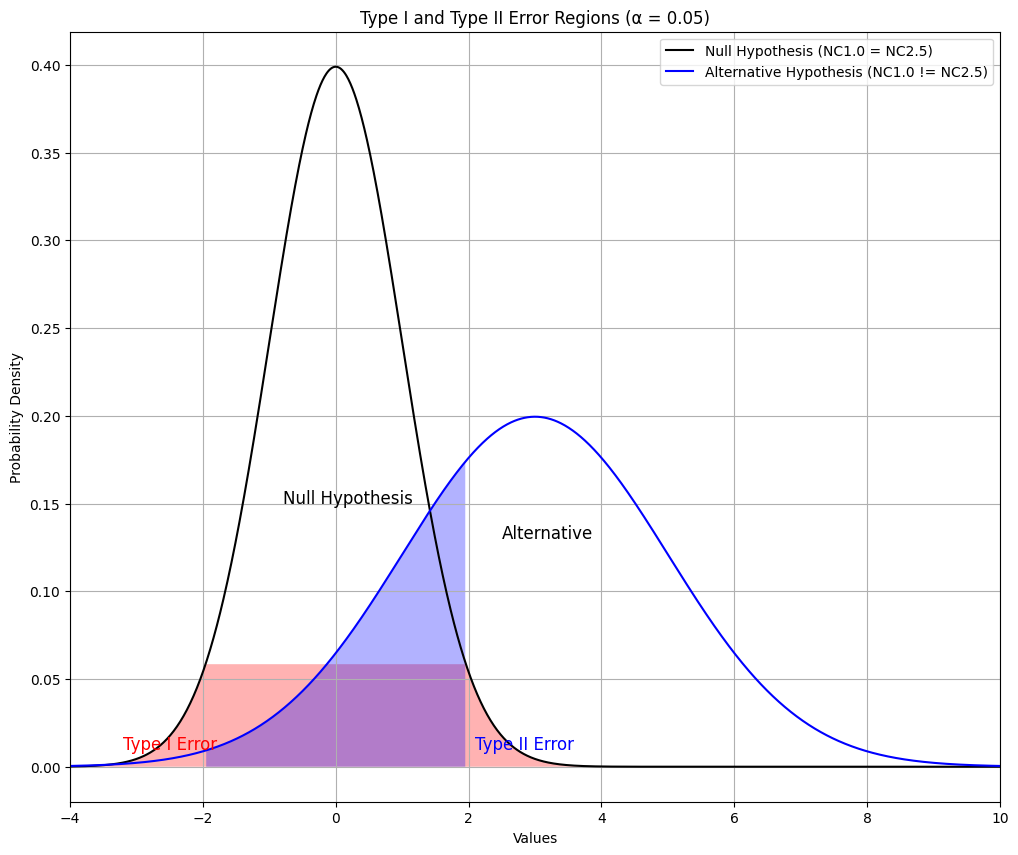

In [ ]:
alpha = 0.05

# Define x-axis values and null & alternative distributions
x = np.arange(-4, 10, 0.01)
null_dist = stats.norm.pdf(x)
alt_dist = stats.norm.pdf(x, loc=3, scale=2)

# Calculate critical region based on alpha (two-tailed test)
critical_lower = stats.norm.ppf(alpha / 2)
critical_upper = stats.norm.ppf(1 - alpha / 2)

# Define Type I and Type II error regions (using boolean indexing)
type_i_error_mask = (x < critical_lower) | (x > critical_upper)  # Combine conditions
type_ii_error_mask = ~(type_i_error_mask)  # Elements not in Type I error regions

# Create the plot
plt.figure(figsize=(12, 10))

# Fill Type I error regions in red
plt.fill_between(x[type_i_error_mask], null_dist[type_i_error_mask], facecolor='red', alpha=0.3)

# Fill Type II error region in blue (transparent)
plt.fill_between(x[type_ii_error_mask], alt_dist[type_ii_error_mask], facecolor='blue', alpha=0.3)

# Plot null and alternative distributions
plt.plot(x, null_dist, label='Null Hypothesis (NC1.0 = NC2.5)', color='black')
plt.plot(x, alt_dist, label='Alternative Hypothesis (NC1.0 != NC2.5)', color='blue')

# Add text labels
plt.text(x=-0.8, y=0.15, s="Null Hypothesis", fontsize=12)
plt.text(x=2.5, y=0.13, s="Alternative", fontsize=12)
plt.text(x=2.1, y=0.01, s="Type II Error", fontsize=12, color='blue')
plt.text(x=-3.2, y=0.01, s="Type I Error", fontsize=12, color='red')


# Customize plot elements
plt.legend()
plt.title("Type I and Type II Error Regions (α = {:.2f})".format(alpha))
plt.xlim(-4, 10)  # Set x-axis limits for better visualization
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.grid(True)

plt.show()

                                                           5) Statistical Power

In [82]:
import scipy.stats as stats
from statsmodels.stats.power import tt_solve_power

nitro1 = df['1stFlrSF']
nitro2 = df['TotalBsmtSF']


In [83]:
n = len(nitro1)
mean_diff = (nitro1 - nitro2).mean()
std_diff = (nitro1 - nitro2).std()
mean_diff
std_diff

np.float64(252.8457813829481)

In [84]:
effect_size = mean_diff / std_diff
alpha = 0.05
power = tt_solve_power(effect_size=effect_size, nobs=n, alpha=alpha, alternative='two-sided' )
print("Statistical Power of the Paired T-test:", power)

Statistical Power of the Paired T-test: 1.0
